In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ryanbadai/clothes-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.37G/1.37G [00:13<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ryanbadai/clothes-dataset/versions/1


In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
train_dir = '/root/.cache/kagglehub/datasets/ryanbadai/clothes-dataset/versions/1/Clothes_Dataset'

In [5]:
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=64,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    label_mode="categorical"  # การตั้งค่าหมายถึงเราต้องการ one-hot encoded labels

)

val_data = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=64,
    validation_split=0.2,
    subset="validation",
    seed=123,
     shuffle=True,
    label_mode="categorical"  # การตั้งค่าหมายถึงเราต้องการ one-hot encoded labels

)

class_names = train_data.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)

Found 7500 files belonging to 15 classes.
Using 6000 files for training.
Found 7500 files belonging to 15 classes.
Using 1500 files for validation.
Class names: ['Blazer', 'Celana_Panjang', 'Celana_Pendek', 'Gaun', 'Hoodie', 'Jaket', 'Jaket_Denim', 'Jaket_Olahraga', 'Jeans', 'Kaos', 'Kemeja', 'Mantel', 'Polo', 'Rok', 'Sweter']


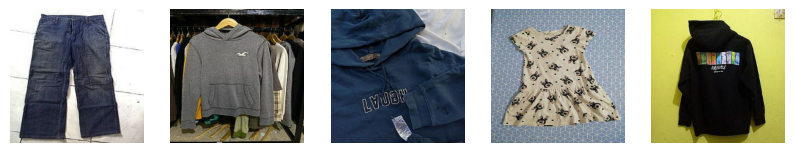

In [6]:
image_batch, label_batch = next(iter(train_data))

# แสดงภาพ 5 ภาพจาก batch แรก
plt.figure(figsize=(10, 10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")

plt.show()

In [7]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# ล็อคชั้นพื้นฐาน
base_model.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

from keras import regularizers
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(224, 224, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# Block 2
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# Block 3
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# Block 4
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(15, activation='softmax'))

# คอมไพล์โมเดลด้วย learning rate ที่ต่ำลง
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,003,055 (103.01 MB)

 Trainable params: 27,000,559 (103.00 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

train_data_augmented = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='categorical',
    subset='training',
    seed=123,
    shuffle=True
)
# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

Found 7500 images belonging to 15 classes.


In [12]:
history = model.fit(train_data_augmented,epochs=150,batch_size=64, validation_data=val_data ,callbacks=[callbacks])
model.evaluate(val_data)

Epoch 1/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.0893 - loss: 5.2094

235/235 ━━━━━━━━━━━━━━━━━━━━ 163s 692ms/step - accuracy: 0.0894 - loss: 5.2088 - val_accuracy: 0.0640 - val_loss: 5.9215 - learning_rate: 1.0000e-04
Epoch 2/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1268 - loss: 4.7959

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 615ms/step - accuracy: 0.1268 - loss: 4.7959 - val_accuracy: 0.0667 - val_loss: 4.8074 - learning_rate: 1.0000e-04
Epoch 3/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.1413 - loss: 4.6197

235/235 ━━━━━━━━━━━━━━━━━━━━ 197s 595ms/step - accuracy: 0.1413 - loss: 4.6197 - val_accuracy: 0.1320 - val_loss: 4.4701 - learning_rate: 1.0000e-04
Epoch 4/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1662 - loss: 4.4873

235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 592ms/step - accuracy: 0.1662 - loss: 4.4873 - val_accuracy: 0.1800 - val_loss: 4.0254 - learning_rate: 1.0000e-04
Epoch 5/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 596ms/step - accuracy: 0.1763 - loss: 4.3759 - val_accuracy: 0.2187 - val_loss: 4.0457 - learning_rate: 1.0000e-04
Epoch 6/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.1913 - loss: 4.2732

235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 592ms/step - accuracy: 0.1914 - loss: 4.2731 - val_accuracy: 0.2327 - val_loss: 3.8734 - learning_rate: 1.0000e-04
Epoch 7/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.2103 - loss: 4.1352

235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 596ms/step - accuracy: 0.2103 - loss: 4.1353 - val_accuracy: 0.2727 - val_loss: 3.7432 - learning_rate: 1.0000e-04
Epoch 8/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.2206 - loss: 4.1109

235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 620ms/step - accuracy: 0.2206 - loss: 4.1108 - val_accuracy: 0.2787 - val_loss: 3.7339 - learning_rate: 1.0000e-04
Epoch 9/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 190s 571ms/step - accuracy: 0.2318 - loss: 4.0026 - val_accuracy: 0.2240 - val_loss: 3.9082 - learning_rate: 1.0000e-04
Epoch 10/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 590ms/step - accuracy: 0.2456 - loss: 3.9490 - val_accuracy: 0.2427 - val_loss: 3.7950 - learning_rate: 1.0000e-04
Epoch 11/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.2467 - loss: 3.8791

235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 596ms/step - accuracy: 0.2467 - loss: 3.8791 - val_accuracy: 0.2907 - val_loss: 3.6383 - learning_rate: 1.0000e-04
Epoch 12/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.2636 - loss: 3.8035

235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 610ms/step - accuracy: 0.2636 - loss: 3.8036 - val_accuracy: 0.3167 - val_loss: 3.4906 - learning_rate: 1.0000e-04
Epoch 13/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 584ms/step - accuracy: 0.2795 - loss: 3.7130 - val_accuracy: 0.2927 - val_loss: 3.6074 - learning_rate: 1.0000e-04
Epoch 14/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 566ms/step - accuracy: 0.2793 - loss: 3.6666 - val_accuracy: 0.2787 - val_loss: 3.6439 - learning_rate: 1.0000e-04
Epoch 15/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.2921 - loss: 3.6227

235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 591ms/step - accuracy: 0.2921 - loss: 3.6226 - val_accuracy: 0.3540 - val_loss: 3.3954 - learning_rate: 1.0000e-04
Epoch 16/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.3059 - loss: 3.5501

235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 591ms/step - accuracy: 0.3059 - loss: 3.5501 - val_accuracy: 0.3887 - val_loss: 3.2013 - learning_rate: 1.0000e-04
Epoch 17/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 569ms/step - accuracy: 0.3015 - loss: 3.4997 - val_accuracy: 0.3553 - val_loss: 3.4621 - learning_rate: 1.0000e-04
Epoch 18/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 572ms/step - accuracy: 0.3172 - loss: 3.4293 - val_accuracy: 0.3847 - val_loss: 3.2658 - learning_rate: 1.0000e-04
Epoch 19/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.3223 - loss: 3.3742

235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 619ms/step - accuracy: 0.3223 - loss: 3.3743 - val_accuracy: 0.4033 - val_loss: 3.1138 - learning_rate: 1.0000e-04
Epoch 20/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 196s 594ms/step - accuracy: 0.3312 - loss: 3.3178 - val_accuracy: 0.3960 - val_loss: 3.1598 - learning_rate: 1.0000e-04
Epoch 21/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.3390 - loss: 3.2896

235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 617ms/step - accuracy: 0.3390 - loss: 3.2895 - val_accuracy: 0.4073 - val_loss: 3.0442 - learning_rate: 1.0000e-04
Epoch 22/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.3495 - loss: 3.2499

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 600ms/step - accuracy: 0.3495 - loss: 3.2498 - val_accuracy: 0.4867 - val_loss: 2.7852 - learning_rate: 1.0000e-04
Epoch 23/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 589ms/step - accuracy: 0.3557 - loss: 3.1842 - val_accuracy: 0.4467 - val_loss: 3.1169 - learning_rate: 1.0000e-04
Epoch 24/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 569ms/step - accuracy: 0.3780 - loss: 3.1403 - val_accuracy: 0.4440 - val_loss: 2.9281 - learning_rate: 1.0000e-04
Epoch 25/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.3914 - loss: 3.0855 - val_accuracy: 0.4727 - val_loss: 2.8966 - learning_rate: 1.0000e-04
Epoch 26/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.4022 - loss: 3.0404 - val_accuracy: 0.4267 - val_loss: 3.1898 - learning_rate: 1.0000e-04
Epoch 27/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.4041 - loss: 2.9981

235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 598ms/step - accuracy: 0.4041 - loss: 2.9981 - val_accuracy: 0.5320 - val_loss: 2.6364 - learning_rate: 1.0000e-04
Epoch 28/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 585ms/step - accuracy: 0.4144 - loss: 2.9874 - val_accuracy: 0.4773 - val_loss: 2.8133 - learning_rate: 1.0000e-04
Epoch 29/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.4313 - loss: 2.9042

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 617ms/step - accuracy: 0.4313 - loss: 2.9043 - val_accuracy: 0.5380 - val_loss: 2.6325 - learning_rate: 1.0000e-04
Epoch 30/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 583ms/step - accuracy: 0.4218 - loss: 2.9015 - val_accuracy: 0.5087 - val_loss: 2.6778 - learning_rate: 1.0000e-04
Epoch 31/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 567ms/step - accuracy: 0.4483 - loss: 2.8567 - val_accuracy: 0.4993 - val_loss: 2.7405 - learning_rate: 1.0000e-04
Epoch 32/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 587ms/step - accuracy: 0.4544 - loss: 2.7900 - val_accuracy: 0.5233 - val_loss: 2.7267 - learning_rate: 1.0000e-04
Epoch 33/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.4597 - loss: 2.7829

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 598ms/step - accuracy: 0.4597 - loss: 2.7829 - val_accuracy: 0.5827 - val_loss: 2.5011 - learning_rate: 1.0000e-04
Epoch 34/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.4664 - loss: 2.7510

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 596ms/step - accuracy: 0.4664 - loss: 2.7510 - val_accuracy: 0.5787 - val_loss: 2.4667 - learning_rate: 1.0000e-04
Epoch 35/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 567ms/step - accuracy: 0.4868 - loss: 2.7162 - val_accuracy: 0.5200 - val_loss: 2.7555 - learning_rate: 1.0000e-04
Epoch 36/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.4936 - loss: 2.6749

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 600ms/step - accuracy: 0.4936 - loss: 2.6750 - val_accuracy: 0.5673 - val_loss: 2.4481 - learning_rate: 1.0000e-04
Epoch 37/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 573ms/step - accuracy: 0.4894 - loss: 2.6641 - val_accuracy: 0.5480 - val_loss: 2.5700 - learning_rate: 1.0000e-04
Epoch 38/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.4870 - loss: 2.6768

235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 603ms/step - accuracy: 0.4870 - loss: 2.6767 - val_accuracy: 0.5873 - val_loss: 2.3493 - learning_rate: 1.0000e-04
Epoch 39/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 585ms/step - accuracy: 0.5094 - loss: 2.5996 - val_accuracy: 0.5467 - val_loss: 2.5845 - learning_rate: 1.0000e-04
Epoch 40/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.4983 - loss: 2.6171

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 598ms/step - accuracy: 0.4983 - loss: 2.6170 - val_accuracy: 0.5980 - val_loss: 2.3439 - learning_rate: 1.0000e-04
Epoch 41/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.5201 - loss: 2.5719

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 613ms/step - accuracy: 0.5201 - loss: 2.5719 - val_accuracy: 0.6193 - val_loss: 2.2627 - learning_rate: 1.0000e-04
Epoch 42/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 582ms/step - accuracy: 0.5136 - loss: 2.5594 - val_accuracy: 0.6027 - val_loss: 2.3164 - learning_rate: 1.0000e-04
Epoch 43/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.5342 - loss: 2.5109 - val_accuracy: 0.5527 - val_loss: 2.5663 - learning_rate: 1.0000e-04
Epoch 44/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 586ms/step - accuracy: 0.5464 - loss: 2.4885 - val_accuracy: 0.6127 - val_loss: 2.2803 - learning_rate: 1.0000e-04
Epoch 45/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 567ms/step - accuracy: 0.5520 - loss: 2.4754 - val_accuracy: 0.5420 - val_loss: 2.6468 - learning_rate: 1.0000e-04
Epoch 46/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.5523 - loss: 2.4730

235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 597ms/step - accuracy: 0.5523 - loss: 2.4730 - val_accuracy: 0.6773 - val_loss: 2.0883 - learning_rate: 1.0000e-04
Epoch 47/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 570ms/step - accuracy: 0.5570 - loss: 2.4365 - val_accuracy: 0.6440 - val_loss: 2.2101 - learning_rate: 1.0000e-04
Epoch 48/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.5745 - loss: 2.4030

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 598ms/step - accuracy: 0.5745 - loss: 2.4031 - val_accuracy: 0.6587 - val_loss: 2.0826 - learning_rate: 1.0000e-04
Epoch 49/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.5623 - loss: 2.4029 - val_accuracy: 0.6333 - val_loss: 2.2108 - learning_rate: 1.0000e-04
Epoch 50/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 570ms/step - accuracy: 0.5702 - loss: 2.3842 - val_accuracy: 0.6493 - val_loss: 2.1632 - learning_rate: 1.0000e-04
Epoch 51/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 570ms/step - accuracy: 0.5752 - loss: 2.3648 - val_accuracy: 0.6240 - val_loss: 2.2676 - learning_rate: 1.0000e-04
Epoch 52/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.5935 - loss: 2.3419

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 614ms/step - accuracy: 0.5934 - loss: 2.3419 - val_accuracy: 0.6767 - val_loss: 2.0444 - learning_rate: 1.0000e-04
Epoch 53/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 585ms/step - accuracy: 0.5822 - loss: 2.3667 - val_accuracy: 0.6780 - val_loss: 2.1167 - learning_rate: 1.0000e-04
Epoch 54/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.5903 - loss: 2.3324 - val_accuracy: 0.6693 - val_loss: 2.0718 - learning_rate: 1.0000e-04
Epoch 55/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.5914 - loss: 2.2914

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 618ms/step - accuracy: 0.5914 - loss: 2.2915 - val_accuracy: 0.7080 - val_loss: 1.9515 - learning_rate: 1.0000e-04
Epoch 56/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 191s 573ms/step - accuracy: 0.5988 - loss: 2.2720 - val_accuracy: 0.6700 - val_loss: 2.0524 - learning_rate: 1.0000e-04
Epoch 57/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 571ms/step - accuracy: 0.6065 - loss: 2.2578 - val_accuracy: 0.6787 - val_loss: 2.0101 - learning_rate: 1.0000e-04
Epoch 58/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6119 - loss: 2.2432

235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 613ms/step - accuracy: 0.6118 - loss: 2.2432 - val_accuracy: 0.7060 - val_loss: 1.9238 - learning_rate: 1.0000e-04
Epoch 59/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 196s 586ms/step - accuracy: 0.6181 - loss: 2.2355 - val_accuracy: 0.5860 - val_loss: 2.4779 - learning_rate: 1.0000e-04
Epoch 60/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 571ms/step - accuracy: 0.6148 - loss: 2.1869 - val_accuracy: 0.6887 - val_loss: 2.0146 - learning_rate: 1.0000e-04
Epoch 61/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 571ms/step - accuracy: 0.6194 - loss: 2.1887 - val_accuracy: 0.7240 - val_loss: 1.9351 - learning_rate: 1.0000e-04
Epoch 62/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 590ms/step - accuracy: 0.6265 - loss: 2.2046 - val_accuracy: 0.6687 - val_loss: 2.0139 - learning_rate: 1.0000e-04
Epoch 63/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 569ms/step - accuracy: 0.6334 - loss: 2.1860 - val_accuracy: 0.6827 - val_loss: 2.0375 - learning_rate: 1.0000e-04
Epoch 64/150
235/235 ━━━━━━━━━━━━━━━━━━━━

235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 604ms/step - accuracy: 0.6390 - loss: 2.1113 - val_accuracy: 0.7400 - val_loss: 1.8222 - learning_rate: 1.0000e-05
Epoch 65/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.6598 - loss: 2.0616

235/235 ━━━━━━━━━━━━━━━━━━━━ 205s 619ms/step - accuracy: 0.6598 - loss: 2.0617 - val_accuracy: 0.7447 - val_loss: 1.8120 - learning_rate: 1.0000e-05
Epoch 66/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6606 - loss: 2.0566

235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 601ms/step - accuracy: 0.6606 - loss: 2.0567 - val_accuracy: 0.7553 - val_loss: 1.7729 - learning_rate: 1.0000e-05
Epoch 67/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 586ms/step - accuracy: 0.6501 - loss: 2.0770 - val_accuracy: 0.7460 - val_loss: 1.7922 - learning_rate: 1.0000e-05
Epoch 68/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.6756 - loss: 2.0244 - val_accuracy: 0.7407 - val_loss: 1.8120 - learning_rate: 1.0000e-05
Epoch 69/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 587ms/step - accuracy: 0.6716 - loss: 2.0045 - val_accuracy: 0.7513 - val_loss: 1.7761 - learning_rate: 1.0000e-05
Epoch 70/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.6686 - loss: 2.0141

235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 618ms/step - accuracy: 0.6687 - loss: 2.0141 - val_accuracy: 0.7600 - val_loss: 1.7449 - learning_rate: 1.0000e-05
Epoch 71/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 570ms/step - accuracy: 0.6729 - loss: 1.9941 - val_accuracy: 0.7527 - val_loss: 1.7566 - learning_rate: 1.0000e-05
Epoch 72/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.6797 - loss: 1.9902

235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 618ms/step - accuracy: 0.6797 - loss: 1.9902 - val_accuracy: 0.7527 - val_loss: 1.7439 - learning_rate: 1.0000e-05
Epoch 73/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 586ms/step - accuracy: 0.6921 - loss: 1.9510 - val_accuracy: 0.7407 - val_loss: 1.7861 - learning_rate: 1.0000e-05
Epoch 74/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6703 - loss: 1.9995

235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 595ms/step - accuracy: 0.6703 - loss: 1.9994 - val_accuracy: 0.7793 - val_loss: 1.6684 - learning_rate: 1.0000e-05
Epoch 75/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.6746 - loss: 1.9635 - val_accuracy: 0.7593 - val_loss: 1.7102 - learning_rate: 1.0000e-05
Epoch 76/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 570ms/step - accuracy: 0.6876 - loss: 1.9366 - val_accuracy: 0.7567 - val_loss: 1.7311 - learning_rate: 1.0000e-05
Epoch 77/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 569ms/step - accuracy: 0.6836 - loss: 1.9329 - val_accuracy: 0.7620 - val_loss: 1.7131 - learning_rate: 1.0000e-05
Epoch 78/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 568ms/step - accuracy: 0.6823 - loss: 1.9411 - val_accuracy: 0.7627 - val_loss: 1.6995 - learning_rate: 1.0000e-05
Epoch 79/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 587ms/step - accuracy: 0.7034 - loss: 1.9021 - val_accuracy: 0.7680 - val_loss: 1.6743 - learning_rate: 1.0000e-05
Epoch 80/150
235/235 ━━━━━━━━━━━━━━━━━━━━

[1.6684476137161255, 0.7793333530426025]

In [ ]:
class_names = list(train_data.class_indices.keys())
class_index = np.argmax(label)  # หา index ของ class
class_label = class_names[class_index]
print(class_label)